In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
L = 100

In [3]:
Mp = L-2
dim_Ap = Mp**2
Ap = np.zeros((dim_Ap, dim_Ap))
for i in range(dim_Ap):
    Ap[i,i] = -5
    if i+1<dim_Ap:
        Ap[i+1, i] = 1
        Ap[i, i+1] = 1
    if L-2+i < dim_Ap:
        Ap[L-2+i, i] = 1
        Ap[i, L-2+i] = 1
for m in range(1,L-2):
        Ap[m*Mp, m*Mp-1] = 0
        Ap[m*Mp-1, m*Mp] = 0
A = np.pad(Ap, (L+1,0), "constant", constant_values=0)
A = np.pad(A, (0,L+1), "constant", constant_values=0)
for n in tqdm(range(2,L-1)):
    A = np.insert(A, n*L-1, 0, axis=0)
    A = np.insert(A, n*L-1, 0, axis=0)
    A = np.insert(A, n*L-1, 0, axis=1)
    A = np.insert(A, n*L-1, 0, axis=1)

A = A + np.eye(A.shape[0])
print(A.shape)

100%|██████████| 97/97 [01:19<00:00,  1.21it/s]


(10000, 10000)


In [4]:
dim_A = A.shape[0]
b = np. zeros(dim_A)

In [5]:
x_0 = np.ones(dim_A)
for i in range(1,L):
    x_0[i] = 1000
print(x_0.shape)

(10000,)


In [6]:
def Jacobi_relaxation(A, b, x_0, epsilon_max = 0.001):
    """
    :param A: 2D Array of shape (n,n)
    :param b:
    :param x_0:
    :param epsilon_max:
    :return: x, num_iterations, np.max(epsilon_mat), np.mean(epsilon_mat)
    """
    x = x_0
    l = int(np.sqrt(A.shape[0]))
    D = np.diag(np.diag(A))
    D_inv = np.linalg.inv(D)
    J = np.matmul(D_inv, D-A)
    epsilon_mat = np.ones((l-2)**2)
    num_iterations = 0
    pbar = tqdm(desc="while loop", total = epsilon_max)
    while np.max(epsilon_mat) > epsilon_max:
        x = np.matmul(D_inv,b) + np.matmul(J,x)
        for r in range((l-2)**2):
            epsilon_mat[r] = np.abs(x[r+l]-0.25*(x[r+2*l]+x[r]+x[r+1+l]+x[r-1+l]))
        num_iterations += 1
        pbar.update(np.max(epsilon_mat))
    return x, num_iterations, np.max(epsilon_mat), np.mean(epsilon_mat)

x_end_JR, num_iter_JR, err_max_JR, err_mean_JR = Jacobi_relaxation(A,b, x_0)

while loop:   0%|          | 0/0.001 [00:00<?, ?it/s]C:\Users\corin\PycharmProjects\Computational-physics\venv\Lib\site-packages\tqdm\std.py:639: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
while loop: 30.69213292049811it [06:39, 13.00s/it]                   


In [7]:
x_end_JR = x_end_JR.reshape(L,L)

In [8]:
def Gauss_Seidel_relaxation(A, b, x_0, epsilon_max = 0.001):
    x = x_0
    l = int(np.sqrt(A.shape[0]))
    D = np.diag(np.diag(A))
    L = np.tril(A, -1)
    R = np.triu(A, 1)
    DL_inv = np.linalg.inv(D+L)
    J = np.matmul(DL_inv, R)
    epsilon_mat = np.ones((l-2)**2)
    num_iterations = 0
    while np.max(epsilon_mat) > epsilon_max:
        x = np.matmul(DL_inv,b) + np.matmul(J,x)
        for r in range((l-2)**2):
            epsilon_mat[r] = np.abs(x[r+l]-0.25*(x[r+2*l]+x[r]+x[r+1+l]+x[r-1+l]))
        num_iterations += 1
    return x, num_iterations, np.max(epsilon_mat), np.mean(epsilon_mat)

x_end_GSR, num_iter_GSR, err_max_GSR, err_mean_GSR = Gauss_Seidel_relaxation(A,b, x_0)

In [ ]:
def SO_relaxation(A, b, x_0, epsilon_max = 0.001, w=1):
    x = x_0
    l = int(np.sqrt(A.shape[0]))
    D = np.diag(np.diag(A))
    L = np.tril(A, -1)
    R = np.triu(A, 1)
    DL_inv = np.linalg.inv(D+L)
    J = np.matmul(DL_inv, R)
    epsilon_mat = np.ones((l-2)**2)
    num_iterations = 0
    while np.max(epsilon_mat) > epsilon_max:
        x_GSR = np.matmul(DL_inv,b) + np.matmul(J,x)
        x = w*x_GSR+(1-w)*x
        for r in range((l-2)**2):
            epsilon_mat[r] = np.abs(x[r+l]-0.25*(x[r+2*l]+x[r]+x[r+1+l]+x[r-1+l]))
        num_iterations += 1
    return x, num_iterations, np.max(epsilon_mat), np.mean(epsilon_mat)

x_end_SOR_05, num_iter_SOR_05, err_max_SOR_05, err_mean_SOR_05 = SO_relaxation(A,b, x_0, w=0.5)
x_end_SOR_1, num_iter_SOR_1, err_max_SOR_1, err_mean_SOR_1 = SO_relaxation(A,b, x_0, w=1)
x_end_SOR_125, num_iter_SOR_125, err_max_SOR_125, err_mean_SOR_125 = SO_relaxation(A,b, x_0, w=1.25)
x_end_SOR_15, num_iter_SOR_15, err_max_SOR_15, err_mean_SOR_15 = SO_relaxation(A,b, x_0, w=1.5)
x_end_SOR_175, num_iter_SOR_175, err_max_SOR_175, err_mean_SOR_175 = SO_relaxation(A,b, x_0, w=1.75)
x_end_SOR_199, num_iter_SOR_199, err_max_SOR_199, err_mean_SOR_199 = SO_relaxation(A,b, x_0, w=1.99)

In [ ]:
x_end_SOR_3, num_iter_SOR_3, err_max_SOR_3, err_mean_SOR_3 = SO_relaxation(A,b, x_0, w=3)

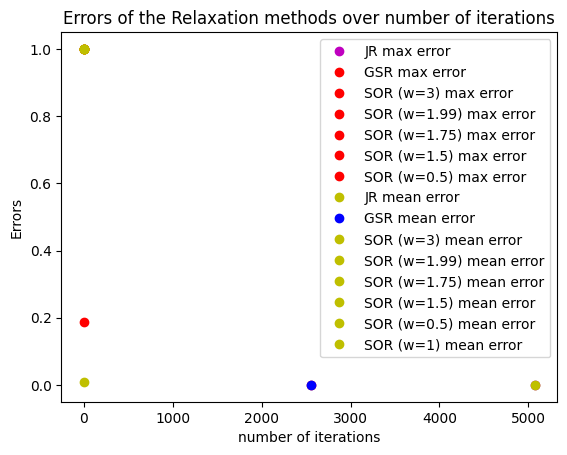

In [14]:
plt.plot(num_iter_JR, err_max_JR, "mo", label = "JR max error")
plt.plot(num_iter_GSR, err_max_GSR, "ro", label= "GSR max error")
plt.plot(num_iter_SOR_3, err_max_SOR_3, "ro", label = "SOR (w=3) max error")
plt.plot(num_iter_SOR_199, err_max_SOR_199, "ro", label = "SOR (w=1.99) max error")
plt.plot(num_iter_SOR_175,err_max_SOR_175, "ro", label = "SOR (w=1.75) max error")
plt.plot(num_iter_SOR_15, err_max_SOR_15, "ro", label = "SOR (w=1.5) max error")
plt.plot(num_iter_SOR_05, err_max_SOR_05, "ro", label = "SOR (w=0.5) max error")
plt.plot(num_iter_SOR_1, err_max_SOR_1, "ro", label = "SOR (w=1) max error")

plt.plot(num_iter_JR, err_mean_JR, "yo", label= "JR mean error")
plt.plot(num_iter_GSR, err_mean_GSR, "bo", label = "GSR mean error")
plt.plot(num_iter_SOR_3, err_mean_SOR_3, "yo", label = "SOR (w=3) mean error")
plt.plot(num_iter_SOR_199, err_mean_SOR_199, "yo", label = "SOR (w=1.99) mean error")
plt.plot(num_iter_SOR_175,err_mean_SOR_175, "yo", label = "SOR (w=1.75) mean error")
plt.plot(num_iter_SOR_15, err_mean_SOR_15, "yo", label = "SOR (w=1.5) mean error")
plt.plot(num_iter_SOR_05, err_mean_SOR_05, "yo", label = "SOR (w=0.5) mean error")
plt.plot(num_iter_SOR_1, err_mean_SOR_1, "yo", label = "SOR (w=1) mean error")

plt.title("Errors of the Relaxation methods over number of iterations")
plt.ylabel("Errors")
plt.xlabel("number of iterations")
plt.legend()